In [1]:
lines = readlines("input")

754-element Vector{String}:
 "872,101"
 "202,854"
 "743,192"
 "555,292"
 "972,40"
 "663,740"
 "1266,656"
 "666,844"
 "418,348"
 "1119,857"
 "755,796"
 "845,199"
 "1210,112"
 ⋮
 "fold along x=655"
 "fold along y=447"
 "fold along x=327"
 "fold along y=223"
 "fold along x=163"
 "fold along y=111"
 "fold along x=81"
 "fold along y=55"
 "fold along x=40"
 "fold along y=27"
 "fold along y=13"
 "fold along y=6"

In [17]:
dots = split.(filter(x->occursin(",",x), lines), ",")
dots = reduce(hcat, dots) |> x -> parse.(Int,x) |> transpose

741×2 transpose(::Matrix{Int64}) with eltype Int64:
  872  101
  202  854
  743  192
  555  292
  972   40
  663  740
 1266  656
  666  844
  418  348
 1119  857
  755  796
  845  199
 1210  112
    ⋮  
  278  185
  818   73
  820  131
  239  864
  606  638
  546  145
  713  570
 1058  560
 1056  432
  329  324
  243  576
  900  710

In [20]:
fold_instructions = split.(filter(x->occursin("fold",x), lines), " ")
fold_instructions = [split(x[3],"=") for x in fold_instructions]

12-element Vector{Vector{SubString{String}}}:
 ["x", "655"]
 ["y", "447"]
 ["x", "327"]
 ["y", "223"]
 ["x", "163"]
 ["y", "111"]
 ["x", "81"]
 ["y", "55"]
 ["x", "40"]
 ["y", "27"]
 ["y", "13"]
 ["y", "6"]

In [23]:
fold(coord, foldpos) = coord <= foldpos ? coord : 2*foldpos - coord

fold (generic function with 1 method)

In [24]:
fold(8,10)

8

In [25]:
fold(12,10)

8

In [28]:
fold.(dots[:,1], 655)

741-element Vector{Int64}:
 438
 202
 567
 555
 338
 647
  44
 644
 418
 191
 555
 465
 100
   ⋮
 278
 492
 490
 239
 606
 546
 597
 252
 254
 329
 243
 410

In [33]:
mat = [1 2; 2 3; 1 2; 3 4]
unique(mat, dims=1)

3×2 Matrix{Int64}:
 1  2
 2  3
 3  4

In [38]:
function vfold(x, dots)
    xs = fold.(dots[:,1], x)
    ys = dots[:,2]
    return unique(hcat(xs, ys), dims=1)
end

vfold (generic function with 1 method)

In [39]:
vfold(parse(Int, fold_instructions[1][2]), dots)

631×2 Matrix{Int64}:
 438  101
 202  854
 567  192
 555  292
 338   40
 647  740
  44  656
 644  844
 418  348
 191  857
 555  796
 465  199
 100  112
   ⋮  
 229  359
 382  749
 580  224
 278  185
 492   73
 490  131
 239  864
 606  638
 597  570
 254  432
 243  576
 410  710

## Part II

In [40]:
function hfold(y, dots)
    ys = fold.(dots[:,2], y)
    xs = dots[:,1]
    return unique(hcat(xs, ys), dims=1)
end

hfold (generic function with 1 method)

In [43]:
folded = dots
for inst in fold_instructions
    folded = inst[1]=="x" ? vfold(parse(Int,inst[2]),folded) : hfold(parse(Int,inst[2]),folded)
end

In [45]:
maximum(folded,dims=1)

1×2 Matrix{Int64}:
 38  5

In [65]:
final = zeros(Int, 6,39)

6×39 Matrix{Int64}:
 0  0  0  0  0  0  0  0  0  0  0  0  0  …  0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  0  0  0     0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  0  0  0     0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  0  0  0     0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  0  0  0     0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  0  0  0  …  0  0  0  0  0  0  0  0  0  0  0  0

In [66]:
for pos in eachrow(folded)
    final[6-pos[2],pos[1]+1] = 1
end
final

6×39 Matrix{Int64}:
 1  1  1  1  0  1  0  0  0  0  1  1  1  …  1  1  0  1  0  0  1  0  1  0  0  0
 1  0  0  0  0  1  0  0  0  0  1  0  0     0  1  0  1  0  1  0  0  1  0  0  0
 1  0  0  0  0  1  0  0  0  0  1  0  0     1  1  0  1  1  1  0  0  1  0  0  0
 1  1  1  0  0  1  1  1  0  0  1  0  0     0  0  0  1  0  0  1  0  1  1  1  0
 1  0  0  0  0  1  0  0  0  0  1  0  0     0  1  0  1  0  0  1  0  1  0  0  0
 1  1  1  1  0  1  1  1  1  0  1  0  0  …  1  0  0  1  1  1  0  0  1  1  1  1

In [59]:
using Plots

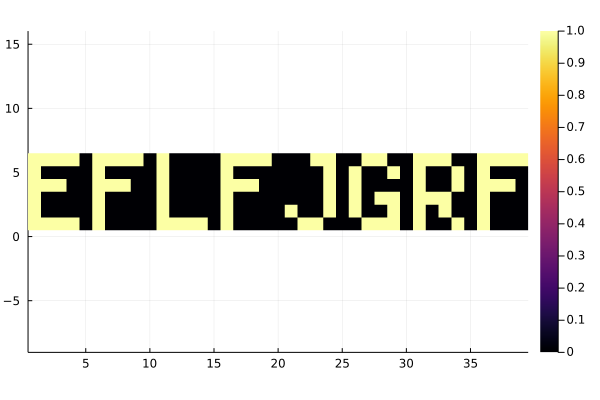

In [67]:
heatmap(final, aspect_ratio=1)